# Static FC analyses Stroke & Elderly

In [1]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/')
sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/Clinical/')
from static_fc import StaticFC
from clinical_analyses import ClinicalAnalyses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/kinany/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0. Load configuration & patient data

In [26]:
with open('../config/sFC_config_test.json') as config_file:
    config = json.load(config_file)

In [4]:
patients = ClinicalAnalyses(config)

Creating instance for config age_stroke_C5toC7
overwrite_clinical: True


In [5]:
clinical_info = patients.get_patient_info()

Extracting clinical data...
Done!


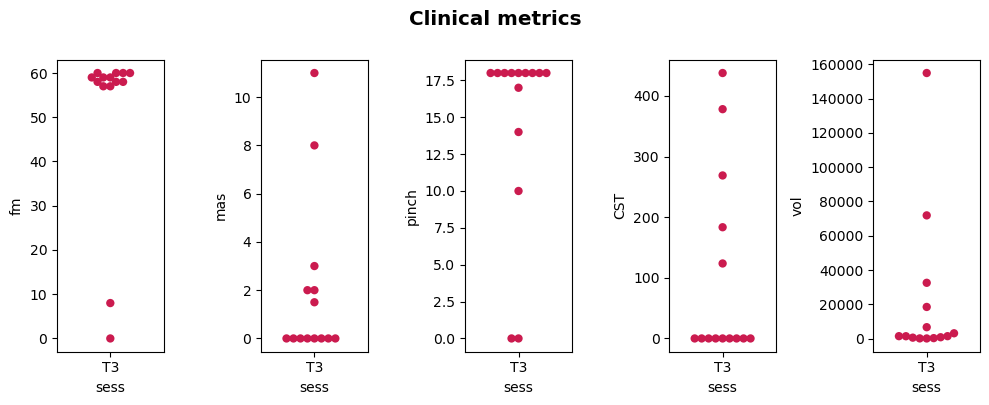

In [6]:
patients.plot_info(clinical_info,['fm','mas','pinch','CST','vol'])

## 1. Prepare FC data

#### 1a. Create instance of StaticFC class for further analyses

In [27]:
sFC = StaticFC(config) 

Creating instance for config age_stroke_C5toC7
overwrite_denoising: True
overwrite_tc: True
overwrite_corr: True
overwrite_alff_maps: True
overwrite_alff_rois: True


#### 1b. Prepare data
*_Denoise (filter or not) > Normalize to PAM50 > Flip if neeeded > Smooth_*

In [ ]:
sFC.prepare_data()

PREPARE DATA
... Denoising
Overwrite old files: True
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:   38.3s
[Parallel(n_jobs=15)]: Done   2 out of   2 | elapsed:   46.5s remaining:    0.0s
[Parallel(n_jobs=15)]: Done   2 out of   2 | elapsed:   46.5s finished
... Operation performed in 46.547 s
... Normalize denoised images
Overwrite old files: True
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.

--
Spinal Cord Toolbox (5.6)

sct_apply_transfo -i /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Stroke/SUVA-TIMES-002/T3/func/SUVA-TIMES-002-T3-fmri_moco_denoised_bp.nii.gz -d /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/PAM50_Age_Stroke/template/PAM50_t2.nii.gz -w /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Stroke/SUVA-TIMES-002/T3/func/Normalization/warp_fmri2template.nii.gz -x spline -o /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Stroke/SUVA-TIMES-002/T3/func/S

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0034.nii -o data_reg_T0034.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
Parse list of warping fields...

Get dimensions of data...
  144 x 48 x 32 x 240

Copying input data to tmp folder and convert to nii...
cp /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/PAM50_Age_Stroke/template/PAM50_t2.nii.gz /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x/PAM50_t2.nii.gz
cp /media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/Stroke/SUVA-TIMES-002/T3/func/Normalization/warp_fmri2template.nii.gz /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x/warp_fmri2template.nii.gz

Split along T dimension...

Apply transformation to each 3D volume...
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0000.nii -o data_reg_T0000.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0034.nii -o data_reg_T0034.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0035.nii -o data_reg_T0035.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0036.nii -o data_reg_T0036.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0037.nii -o data_reg_T0037.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0038.nii -o data_reg_T0038.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0072.nii -o data_reg_T0072.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0035.nii -o data_reg_T0035.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0036.nii -o data_reg_T0036.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0037.nii -o data_reg_T0037.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0038.nii -o data_reg_T0038.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0072.nii -o data_reg_T0072.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0073.nii -o data_reg_T0073.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0074.nii -o data_reg_T0074.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0075.nii -o data_reg_T0075.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0076.nii -o data_reg_T0076.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0110.nii -o data_reg_T0110.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0073.nii -o data_reg_T0073.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0074.nii -o data_reg_T0074.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0075.nii -o data_reg_T0075.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0076.nii -o data_reg_T0076.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0110.nii -o data_reg_T0110.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0111.nii -o data_reg_T0111.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0112.nii -o data_reg_T0112.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0113.nii -o data_reg_T0113.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0114.nii -o data_reg_T0114.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0148.nii -o data_reg_T0148.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0111.nii -o data_reg_T0111.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0112.nii -o data_reg_T0112.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0113.nii -o data_reg_T0113.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0114.nii -o data_reg_T0114.nii -t warp_fmri2template.nii.gz -r P

/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0148.nii -o data_reg_T0148.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.938757-apply_transfo-w119ii8x
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0149.nii -o data_reg_T0149.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0150.nii -o data_reg_T0150.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0151.nii -o data_reg_T0151.nii -t warp_fmri2template.nii.gz -r PAM50_t2.nii.gz -n 'BSpline[3]' # in /tmp/sct-20231025184129.419242-apply_transfo-rj6zlyis
/home/kinany/sct_5.6/bin/isct_antsApplyTransforms -d 3 -i data_T0152.nii -o data_reg_T0152.nii -t warp_fmri2template.nii.gz -r P

####  1c. Load timecourses

In [22]:
tcs = sFC.extract_tcs()

Timecourses extraction
Overwrite old files: True
Extracting timecourses for subject SUVA-TIMES-002
...Session T3
......In iCAP_C5toC7_VL
......In iCAP_C5toC7_VR
......In iCAP_C5toC7_DL
......In iCAP_C5toC7_DR
Extracting timecourses for subject SUVA-TIMES-003
...Session T3
......In iCAP_C5toC7_VL


ValueError: Mask affine: 
[[  -0.5     0.      0.     35.  ]
 [   0.      0.5     0.    -81.22]
 [   0.      0.      0.5  -206.84]
 [   0.      0.      0.      1.  ]]
 is different from img affine:
[[  -0.97    0.      0.     35.  ]
 [   0.      0.97    0.    -81.22]
 [   0.      0.      3.   -206.84]
 [   0.      0.      0.      1.  ]]

### 2. Correlations analyses

#### 2a. Computations

ROI-TO-ROI CORRELATION
Overwrite old files: True
...Compute correlations


/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/static_fc.py:241: RuntimeWarning: divide by zero encountered in arctanh
  rhos_Z.append(np.arctanh(np.corrcoef(tcs.loc[(tcs['sub']==sub) & (tcs['sess']==sess) & (tcs['roi']==roi1),'tc'].values, tcs.loc[(tcs['sub']==sub) & (tcs['sess']==sess) & (tcs['roi']==roi2),'tc'].values)[1,0]))


...Compute statistical significance


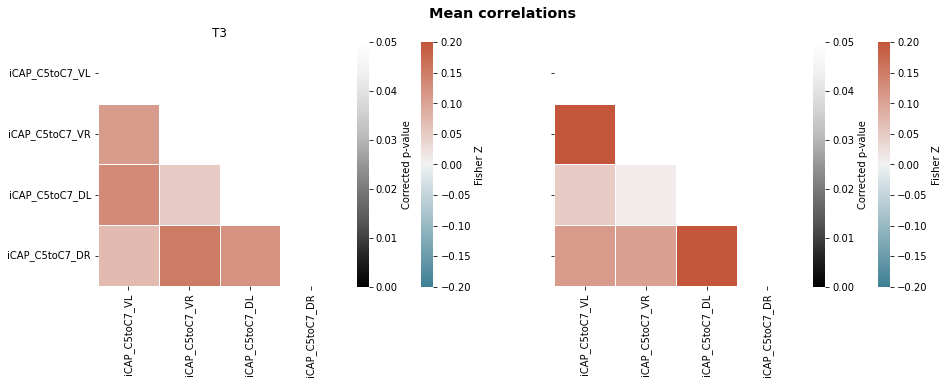

In [44]:
corrs_df,corrs_stats_df = sFC.compute_correlations(tcs=tcs)

COMPARE FC PATTERNS BETWEEN GROUPS
Group 1: T3
Group 2: 


/home/kinany/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1218: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/home/kinany/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6111: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2


(              roi1            roi2         p
 0   iCAP_C5toC7_VL  iCAP_C5toC7_VL       NaN
 1   iCAP_C5toC7_VL  iCAP_C5toC7_VR  0.251582
 2   iCAP_C5toC7_VL  iCAP_C5toC7_DL  0.297773
 3   iCAP_C5toC7_VL  iCAP_C5toC7_DR  0.444075
 4   iCAP_C5toC7_VR  iCAP_C5toC7_VL  0.251582
 5   iCAP_C5toC7_VR  iCAP_C5toC7_VR       NaN
 6   iCAP_C5toC7_VR  iCAP_C5toC7_DL  0.434099
 7   iCAP_C5toC7_VR  iCAP_C5toC7_DR  0.512424
 8   iCAP_C5toC7_DL  iCAP_C5toC7_VL  0.297773
 9   iCAP_C5toC7_DL  iCAP_C5toC7_VR  0.434099
 10  iCAP_C5toC7_DL  iCAP_C5toC7_DL       NaN
 11  iCAP_C5toC7_DL  iCAP_C5toC7_DR  0.014665
 12  iCAP_C5toC7_DR  iCAP_C5toC7_VL  0.444075
 13  iCAP_C5toC7_DR  iCAP_C5toC7_VR  0.512424
 14  iCAP_C5toC7_DR  iCAP_C5toC7_DL  0.014665
 15  iCAP_C5toC7_DR  iCAP_C5toC7_DR       NaN,
 array([[  nan, -0.1 ,  0.08, -0.04],
        [-0.1 ,   nan,  0.04,  0.05],
        [ 0.08,  0.04,   nan, -0.09],
        [-0.04,  0.05, -0.09,   nan]]))

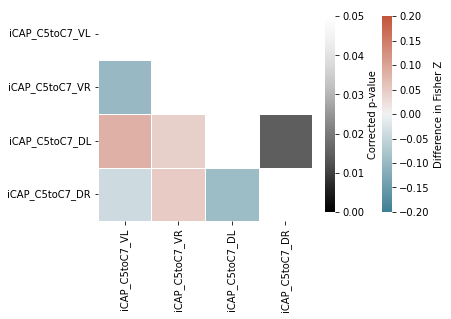

In [45]:
sFC.compare_correlations(corrs_df, ['T3',''], paired=False)

In [36]:
corrs_df

,sub,sess,roi1,roi2,rho_Z
0,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,18.368400
1,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_R,0.093489
2,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_L,0.093489
3,SUVA-TIMES-002,T3,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_R,inf
4,SUVA-TIMES-003,T3,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,inf
...,...,...,...,...,...
79,sub-009,,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_R,inf
80,sub-011,,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_L,inf
81,sub-011,,iCAP_C5toC7_CST_L,iCAP_C5toC7_CST_R,0.083622
82,sub-011,,iCAP_C5toC7_CST_R,iCAP_C5toC7_CST_L,0.083622


#### 2b. Link with functional connectivity
_Note: for the next steps, select corrs_totest(_names) based on config & chosen analyses_

#### Option 1: Interhemispheric FC

_**If using whole cord**_

In [144]:
vv = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_DR') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VL') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]   
vr_dl = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VR') & (corrs_df['roi2']=='iCAP_C5toC7_DL')]['rho_Z'].values]    
vl_dr = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='iCAP_C5toC7_VL') & (corrs_df['roi2']=='iCAP_C5toC7_DR')]['rho_Z'].values]    
# For all
#corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))
#corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR']

# Just for DD VV
corrs_totest = np.transpose(np.concatenate((vv,dd),axis=0))
corrs_totest_names = ['V-V','D-D']

_**If using all individual spinal levels**_

In [ ]:
c5_vv = [corrs_df[(corrs_df['roi1']=='C5_VR') & (corrs_df['roi2']=='C5_VL')]['rho_Z'].values]
c5_dd = [corrs_df[(corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_DL')]['rho_Z'].values]
c6_vv = [corrs_df[(corrs_df['roi1']=='C6_VR') & (corrs_df['roi2']=='C6_VL')]['rho_Z'].values]
c6_dd = [corrs_df[(corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_DL')]['rho_Z'].values]
c7_vv = [corrs_df[(corrs_df['roi1']=='C7_VR') & (corrs_df['roi2']=='C7_VL')]['rho_Z'].values]
c7_dd = [corrs_df[(corrs_df['roi1']=='C7_DR') & (corrs_df['roi2']=='C7_DL')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((c5_vv,c5_dd,c6_vv,c6_dd,c7_vv,c7_dd),axis=0))
corrs_totest_names = ['C5 V-V','C5 D-D','C6 V-V','C6 D-D','C7 V-V','C7 D-D']

#### Option 2: Significant FC

_Note: there were 3 significant correlations: **(1)** C5DR-C5VR, **(2)** C6DL-C6DR, **(3)** C6DR-C6VR_

In [ ]:
C5DR_C5VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_VR')]['rho_Z'].values]
C6DL_C6DR  = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DL') & (corrs_df['roi2']=='C6_DR')]['rho_Z'].values]
C6DR_C6VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_VR')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((C5DR_C5VR,C6DL_C6DR,C6DR_C6VR),axis=0))
corrs_totest_names = ['C5DR-C5VR','C6DL-C6DR','C6DR-C6VR']

#### ! To run for all options

,tested,clinical,rho,p
0,V-V,fm,-0.219940,0.492166
1,D-D,fm,0.170430,0.596407
2,V-V,mas,0.014713,0.963803
3,D-D,mas,-0.165596,0.607016
4,V-V,pinch,-0.273675,0.389387
5,D-D,pinch,0.314195,0.319935
6,V-V,CST,0.089405,0.782307
7,D-D,CST,0.288012,0.363987
8,V-V,vol,0.033095,0.918673
9,D-D,vol,-0.348911,0.266319


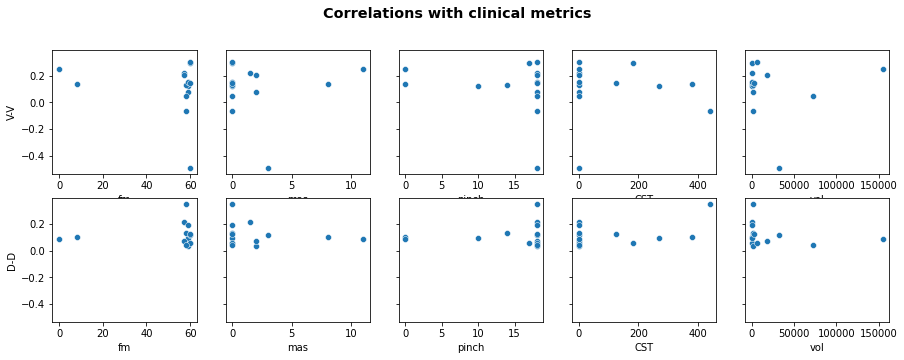

In [145]:
patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=corrs_totest,totest_names=corrs_totest_names)


In [160]:
frames_df = pd.read_csv('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',header=None, names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

In [168]:
frames = np.loadtxt('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',delimiter=",")

In [185]:
frames[:,[3,6,16,21]]

array([[14., 11., 13., 10.],
       [17., 21., 16., 14.],
       [10., 11., 11.,  5.],
       [18., 19., 18., 10.],
       [27., 17.,  9.,  9.],
       [ 9., 14., 16.,  6.],
       [29., 22., 13.,  8.],
       [23., 13., 12., 10.],
       [17., 17., 12., 14.],
       [20., 11., 11.,  6.],
       [16., 24., 14., 19.],
       [15., 20., 13.,  6.],
       [18., 13.,  6., 18.],
       [11.,  8., 14., 15.]])

In [180]:
t=clinical_correlations['p']<0.01
[i for i, x in enumerate(t) if x]

[130]

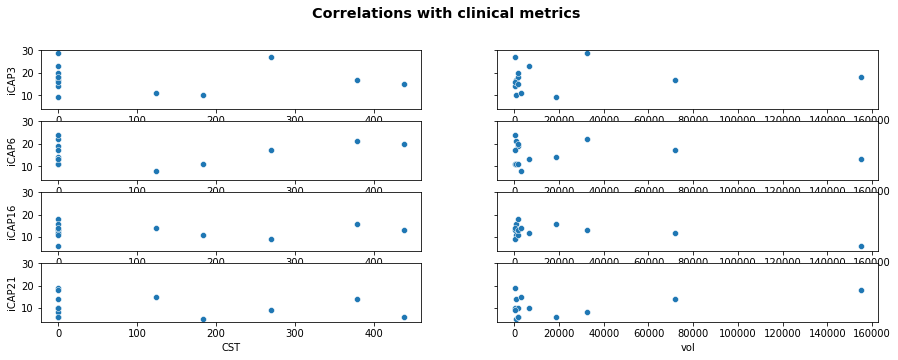

In [188]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['CST','vol'],totest_values=frames[:,[3,6,16,21]],totest_names=['iCAP3','iCAP6','iCAP16','iCAP21'])

In [189]:
clinical_correlations

,tested,clinical,rho,p
0,iCAP3,CST,-0.295225,0.351547
1,iCAP6,CST,0.332495,0.290981
2,iCAP16,CST,0.594227,0.041598
3,iCAP21,CST,-0.205937,0.520788
4,iCAP3,vol,0.012047,0.970358
5,iCAP6,vol,-0.116399,0.718662
6,iCAP16,vol,-0.677699,0.015448
7,iCAP21,vol,0.460771,0.131674


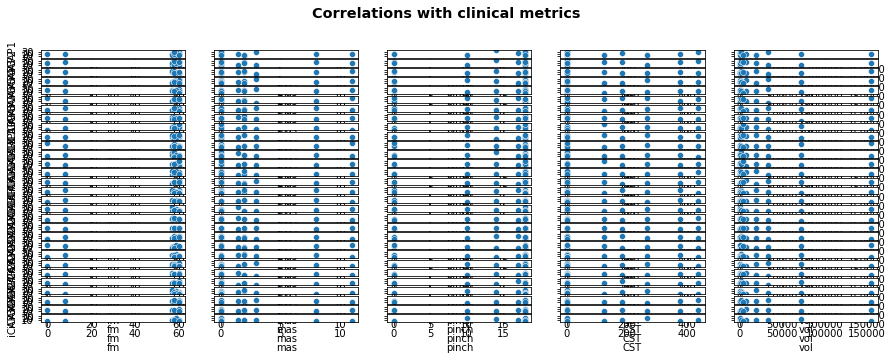

In [179]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=frames,totest_names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

#### Test with classification

In [86]:
# Extract corr for controls (already done above for patients)
vv = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_DR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]   
vr_dl = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]    
vl_dr = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
corrs_totest_H = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))


In [107]:
# Create dataframe
corrs_totest_P_withgrp = np.hstack((corrs_totest_P, 2*np.ones((corrs_totest_P.shape[0], 1))))
corrs_totest_H_withgrp = np.hstack((corrs_totest_H, np.ones((corrs_totest_H.shape[0], 1))))
data_classif = np.concatenate([corrs_totest_P_withgrp, corrs_totest_H_withgrp],axis=0)
col_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR', 'grp']
data_classif_df = pd.DataFrame(data=data_classif, columns=col_names)

In [110]:
data_classif_df['grp'] = data_classif_df['grp'].astype('int')

In [121]:
X = data_classif_df[col_names[:-1]]
y = data_classif_df[col_names[-1]]

In [135]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X) 

In [136]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X, y) 


SVC(random_state=0)

In [139]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 8) 
accuracies.mean() 
accuracies.std()

0.0721687836487032

#### 3. ALFF analyses

In [146]:
sFC.compute_alff_maps()

ALFF MAPS COMPUTATION
Overwrite old files: False
... Smooth normalized filtered image that do not need to be flipped
Overwrite old files: False
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Batch computation too fast (0.0170s.) Setting batch_size=2.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done   3 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=15)]: Done   5 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done   7 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=15)]: Done   9 out of  15 | elapsed:    0.0s remai

ALFF IN ROIS
Overwrite old files: True
Extracting ALFF for subject SUVA-TIMES-002
...Session T3
230315-15:30:39,154 nipype.interface INFO:
	 stdout 2023-03-15T15:30:39.153712:2.870059 
230315-15:30:40,301 nipype.interface INFO:
	 stdout 2023-03-15T15:30:40.301539:2.786321 
230315-15:30:41,412 nipype.interface INFO:
	 stdout 2023-03-15T15:30:41.412606:2.970355 
230315-15:30:42,527 nipype.interface INFO:
	 stdout 2023-03-15T15:30:42.526804:2.995577 
Extracting ALFF for subject SUVA-TIMES-003
...Session T3
230315-15:30:43,789 nipype.interface INFO:
	 stdout 2023-03-15T15:30:43.789297:3.321278 
230315-15:30:44,896 nipype.interface INFO:
	 stdout 2023-03-15T15:30:44.896341:3.620286 
230315-15:30:45,974 nipype.interface INFO:
	 stdout 2023-03-15T15:30:45.974196:3.775532 
230315-15:30:47,41 nipype.interface INFO:
	 stdout 2023-03-15T15:30:47.041266:3.859465 
Extracting ALFF for subject SUVA-TIMES-006
...Session T3
230315-15:30:48,355 nipype.interface INFO:
	 stdout 2023-03-15T15:30:48.355330:

Extracting ALFF for subject sub-011
...Session 
230315-15:32:13,209 nipype.interface INFO:
	 stdout 2023-03-15T15:32:13.209528:2.988704 
230315-15:32:14,344 nipype.interface INFO:
	 stdout 2023-03-15T15:32:14.344504:2.913221 
230315-15:32:15,489 nipype.interface INFO:
	 stdout 2023-03-15T15:32:15.488896:2.812623 
230315-15:32:16,594 nipype.interface INFO:
	 stdout 2023-03-15T15:32:16.594634:2.805968 


,sub,sess,roi,alff
0,SUVA-TIMES-002,T3,iCAP_C5toC7_VL,2.870059
1,SUVA-TIMES-002,T3,iCAP_C5toC7_VR,2.786321
2,SUVA-TIMES-002,T3,iCAP_C5toC7_DL,2.970355
3,SUVA-TIMES-002,T3,iCAP_C5toC7_DR,2.995577
4,SUVA-TIMES-003,T3,iCAP_C5toC7_VL,3.321278
...,...,...,...,...
79,sub-009,,iCAP_C5toC7_DR,2.807098
80,sub-011,,iCAP_C5toC7_VL,2.988704
81,sub-011,,iCAP_C5toC7_VR,2.913221
82,sub-011,,iCAP_C5toC7_DL,2.812623


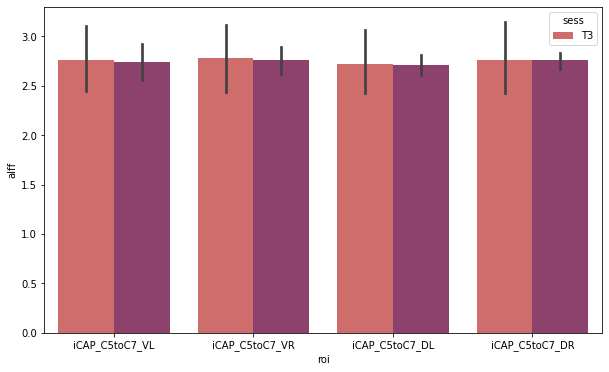

In [147]:
sFC.compute_alff_rois()